<a href="https://colab.research.google.com/github/KrasiKirov/Infographic-Challenge-project/blob/main/Infographic_Challenge_Mathieu_Allaire_%26_Krasimir_Kirov_(Final_Version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Winter 2022

Infographic Challenge


Mathieu Allaire (Section 03) and Krasimir Kirov (Section 03)

April 26th, 2022

# Infographic Challenge

Sameer Bhatnagar


360-420-DW, sections 1, 2, & 3


Due end of day April 26th, 2022
(in teams)

Weight of Final Grade for this assessment: 3%
 
 - 2/3 : graph meets all basic criteria
 - 3/3 : graph surpasses basic criteria 

## Task: 

 - Watch the original [2006 GapMinder Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) by Hans Rosling

 - Using the URL paths to the three datasets given below, produce a graph similar to what he shows in the talk. The basic criteria are:
   - Scatter plot where Life Expectancy (proxy for health), is plotted on the vertical, and GDP (proxy for wealth) on the horizontal axis. 
   - Each country should be a point on the graph, where the color of the country is given by its "region"/continent, and the size is its population.
   - Use logarithmic scales for the axes the way Hans Rosling does.
   - No need to do an _animation_ between years: simply show a separate subplot for every decade between 1970 and 2020 (using 6 "sub plots"). 


- The concepts/techniques you will likely need to use:

    - [rename columns](https://pandas.pydata.org/docs/user_guide/basics.html#basics-rename)
    - [melt data](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) from wide format to long
    - [merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) two different sets of data


- Ways to _surpass_ basic criteria
  - Figure out how to animate a single scatter plot across time. Example of how to create animations in colab notebooks [here](https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb).
  - Accompany your graph with some analysis (what patterns should the reader notice? Are there interesting moments in history that reveal themselves through these graphs?)   

 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [ ]:
# Paths to different datasets

url_population = "https://docs.google.com/spreadsheets/d/1IbDM8z5XicMIXgr93FPwjgwoTTKMuyLfzU6cQrGZzH8/export?format=csv"
url_gdp = "https://docs.google.com/spreadsheets/d/1RctTQmKB0hzbm1E8rGcufYdMshRdhmYdeL29nXqmvsc/export?format=csv"
url_life_exp = "https://docs.google.com/spreadsheets/d/1H3nzTwbn8z4lJ5gJ_WfDgCeGEXK3PVGcNjQ_U5og8eo/export?format=csv"
url_cc = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQi7uUN0tNTP8P_tatvy9faJ0QaOT6T2ksARXjQaKTQFTG-pGnDFWrzU-C2kbrSVFTXJZiuTud0js29/pub?gid=0&single=true&output=csv"

In [ ]:
df_pop=pd.read_csv(url_population)
df_gdp=pd.read_csv(url_gdp)
df_life_exp = pd.read_csv(url_life_exp)
df_cc = pd.read_csv(url_cc)

df_cc.sample(10)

,Country,Continent
207,Solomon Islands,Oceania
115,Kiribati,Oceania
129,Lithuania,Europe
95,Haiti,North America
130,Luxembourg,Europe
208,Somalia,Africa
55,Cuba,North America
70,Estonia,Europe
60,Djibouti,Africa
59,Denmark,Europe


In [ ]:
df_gdp = df_gdp.rename(
    columns={
        "Income per person (fixed 2000 US$)":"Country"
    }
)
df_pop = df_pop.rename(
    columns={
        "Total population":"Country"
    }
)
df_life_exp = df_life_exp.rename(
    columns={
        "Life expectancy":"Country"
    }
)

In [ ]:
df_gdp.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


In [ ]:
df_gdp_long = df_gdp.melt(
    id_vars="Country"
).rename(
    columns={
        "variable":"year",
        "value":"gdp"
    }
)
df_life_exp_long = df_life_exp.melt(
    id_vars="Country"
).rename(
    columns={
        "variable":"year",
        "value":"LifeExp"
    }
)
df_pop_long = df_pop.melt(
    id_vars="Country"
).rename(
    columns={
        "variable":"year",
        "value":"Population"
    }
)

#Sample only for United States
df_life_exp_long[df_life_exp_long["Country"]=="United Sates"]

,Country,year,LifeExp


In [ ]:
df_pop_long["Population"] = df_pop_long["Population"].str.replace(",","").fillna("0").map(int)

In [ ]:
df_long = pd.merge(
    df_gdp_long,
    df_life_exp_long,
    on = ["Country","year"]
)

df_long = pd.merge(
    df_long,
    df_cc,
    on = "Country"
)

df_long = pd.merge(
    df_long,
    df_pop_long,
    on = ["Country","year"]
)

df_long.sample(5)

,Country,year,gdp,LifeExp,Continent,Population
4667,Guinea,1999,355.235486,54.00,Africa,8647336
11450,Togo,1970,295.081415,47.72,Africa,2115521
9561,St. Kitts and Nevis,2005,10265.821870,NaN,North America,49139
232,Algeria,1984,2008.472176,66.15,Africa,21893857
4868,Holy See,1992,NaN,NaN,Europe,775


In [ ]:
color_mapping = {
    "Asia": "red",
    "Oceania": "blue",
    "Africa": "yellow",
    "Europe": "green",
    "North America": "orange",
    "South America": "pink"
}
df_long["Continent_color"] = df_long["Continent"].map(color_mapping)
df_long.sample(5)

,Country,year,gdp,LifeExp,Continent,Population,Continent_color
4479,Guam,1967,NaN,64.72,Oceania,78409,blue
10516,Somalia,1972,NaN,43.90,Africa,3490295,yellow
1204,Benin,1968,288.837583,42.69,Africa,2788551,yellow
5287,Ireland,1995,17188.388550,77.10,Europe,3645333,green
3367,El Salvador,1999,2175.120985,71.60,North America,5775660,orange


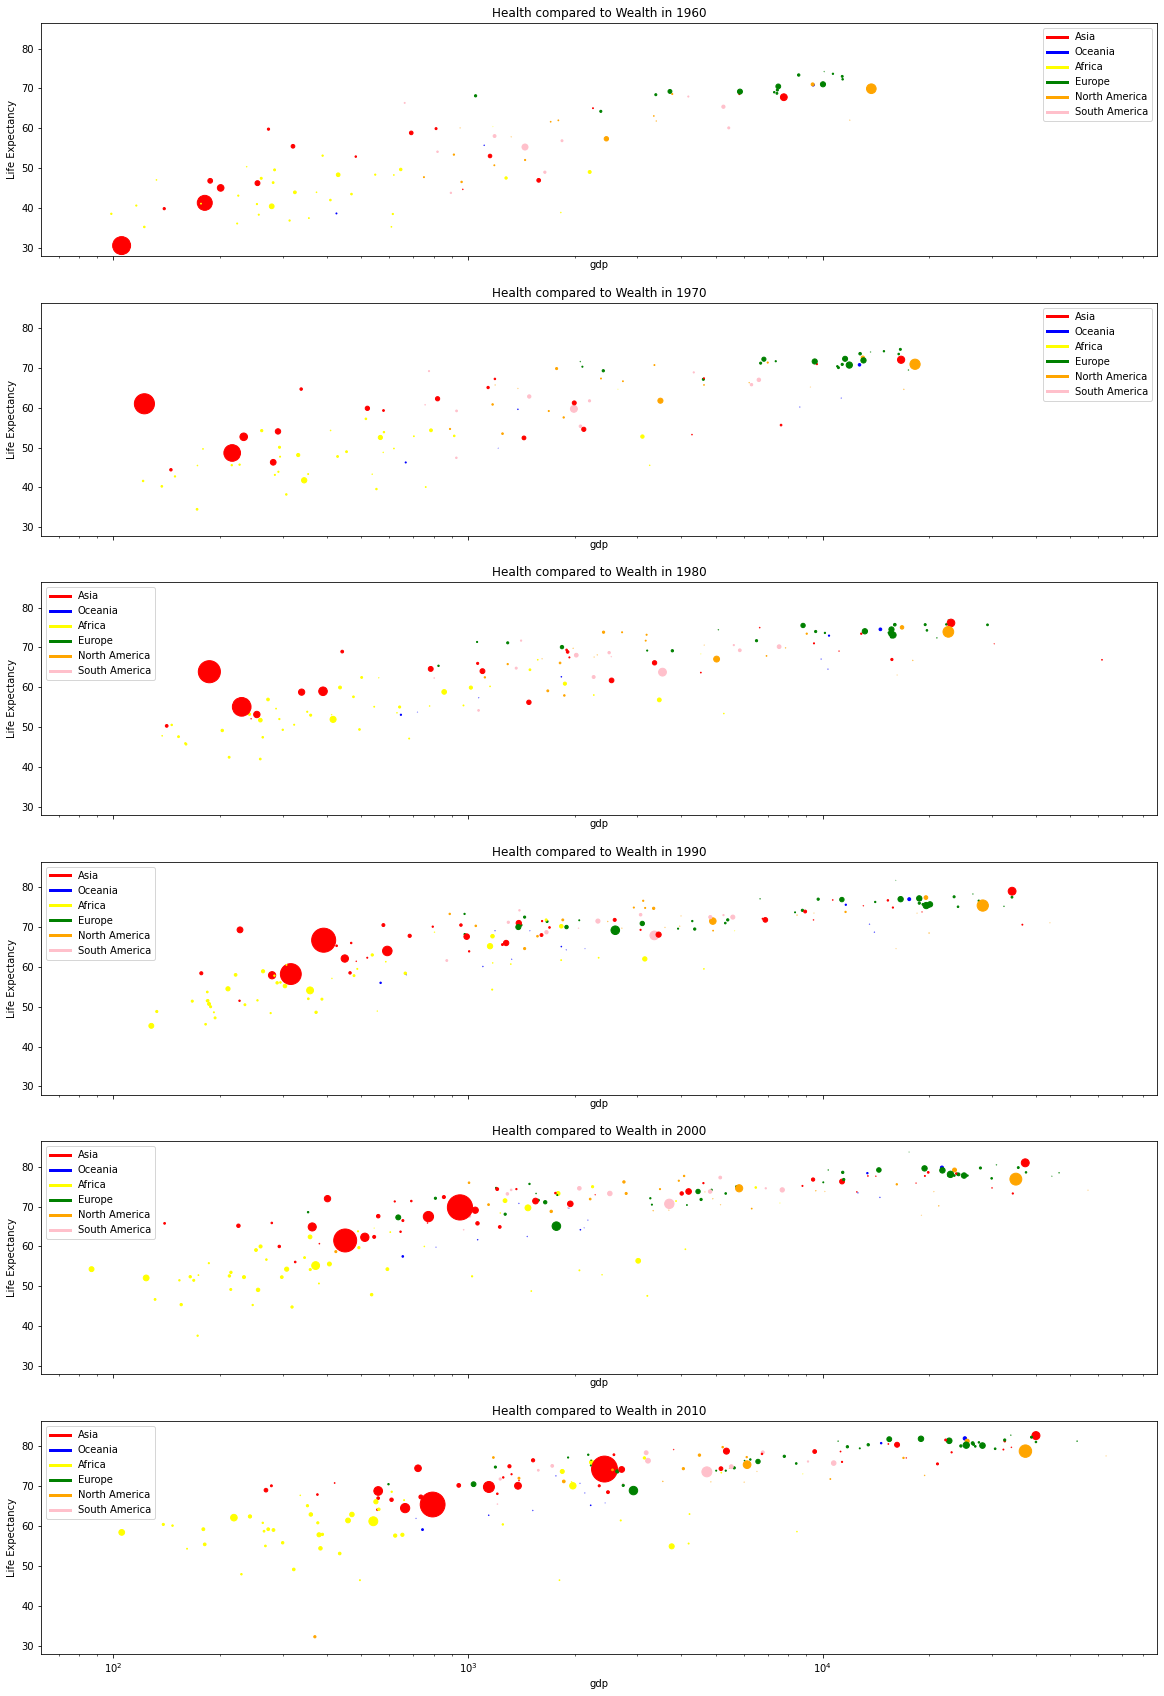

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, axes = plt.subplots(nrows=6,ncols=1,figsize=(20,30),sharex=True,sharey=True)
#ax.set_title('Hans Rosling Model')
plt.xscale("log")
YEARS = ["1960","1970","1980","1990","2000","2010"]


colors = ['red', 'blue', 'yellow',"green", "orange", "pink"]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ["Asia","Oceania","Africa","Europe","North America","South America"]

for i,YEAR in enumerate(YEARS):
  axes[i].set_xlabel('gdp')
  axes[i].set_ylabel('Life Expectancy')
  axes[i].title.set_text(f"Health compared to Wealth in {YEAR}")
  df_long_YEAR = df_long[df_long["year"]==YEAR]
  axes[i].scatter(
      x = df_long_YEAR["gdp"],
      y = df_long_YEAR["LifeExp"],
      c = df_long_YEAR["Continent_color"],
      s = df_long_YEAR["Population"]/2000000
  )

axes[0].legend(lines, labels)
axes[1].legend(lines, labels)
axes[2].legend(lines, labels)
axes[3].legend(lines, labels)
axes[4].legend(lines, labels)
axes[5].legend(lines, labels)

# Analysis

Asia saw a an increase in both life expectancy and gdp since 1960. Furthermore, compared to other continents, Asia has seen a way bigger increase in population size. This is most likely a representation of the high industrialization rate and development of the Asian countries since the end of the Second World War. As for African countries, there was no real change except for their population sizes. This shows that Africa, even after gaining independence from their old colonies, have yet to either industralize or make meaningful use of the little resources they have due to the continents climate to have a sizeable increase in gdp as well as life expectancy. In Europe, there was no real sizeable increase in life expectancy over the years, and the only noticeable difference seems to occur in an increase in population size in the lower gdp european countries in 1990.If we assume those lower gdp countries are eastern european countries, this might be due to the dismantlement of the USSR around these times, where the increase in freedom and industralization might have provoked a sudden increase in population size.There was a steady increase seen in the life expectancy gdp of North American countries, which may be due to the amount of territory and natural resources they had access to that was still largely untouched by the world (like forests, potable water, ores,etc.). Finally, for South America, there surprisingly has not been an increase in gdp that went along with the increase in life expectancy of the South American countries. This might be due to socioeconomic causes such as lack of education, slow development of indutries, etc. So, as much as the population and life expectancy has increased, which is a sign of overall health improvement, the economic side of the South American countries does not seem to have improved noticeably overall.  
